In [26]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file and the specific sheet into a DataFrame
file_path = '/content/ABC University.xlsx'
df = pd.read_excel(file_path, sheet_name="Adamas University npf dump")

In [27]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31604 entries, 0 to 31603
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        31604 non-null  object        
 1   Mobile                      31604 non-null  object        
 2   Lead Origin                 31604 non-null  object        
 3   Country                     31604 non-null  object        
 4   State                       31604 non-null  object        
 5   City                        31604 non-null  object        
 6   Instance                    31604 non-null  object        
 7   Instance Date               31604 non-null  datetime64[ns]
 8   Campaign                    31604 non-null  object        
 9   Lead Stage                  31604 non-null  object        
 10  Lead Status                 31604 non-null  object        
 11  Email Verification Status   31604 non-null  object    

In [31]:
# Display the first few rows of the DataFrame
df.head()

,Name,Mobile,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,...,Mobile Verification Status,Registration Device,Course,Specialization,Campus,Last Lead Activity Date,Form Initiated,Paid Applications,Submitted Applications,Enrolment Status
0,Ram Yadav,9830******,API,India,West Bengal,Kolkata,Primary,2023-10-09,Meta/85/API,Untouched,...,No,Unknown,B.Tech in Biomedical Engineering,Specialization Not Available,UG,2023-10-09 11:26:00,0,0,0,No
1,Anamika Bairagi,7439******,API,India,West Bengal,Barasat,Primary,2023-10-09,Meta/84/API,Disqualified,...,No,Unknown,"BCA (Hons) in Banking, Financial Services and ...",Specialization Not Available,UG,2023-10-09 11:20:00,0,0,0,No
2,Puja Singh,7003******,API,India,West Bengal,Kolkata,Primary,2023-10-09,Meta/85/API,No Response,...,No,Unknown,"MBA (Human Resource, Marketing, Finance)",Specialization Not Available,PG,2023-10-09 10:17:00,0,0,0,No
3,Jhuma Haldar,9831******,API,India,West Bengal,Kolkata,Primary,2023-10-09,Meta/88/API,Disqualified,...,No,Unknown,M.A in Public Policy,Specialization Not Available,PG,2023-10-09 10:16:00,0,0,0,No
4,Rajan Kumar,9128******,API,India,West Bengal,Kolkata,Primary,2023-10-09,Meta/85/API,Disqualified,...,No,Unknown,B.Com (H),Specialization Not Available,UG,2023-10-09 08:14:00,0,0,0,No


In [ ]:
# Describe the numerical data
df.describe()

,Instance Date,Last Lead Activity Date,Form Initiated,Paid Applications,Submitted Applications
count,31604,31604,31604.000000,31604.000000,31604.000000
mean,2023-06-13 21:59:59.088723200,2023-07-16 03:43:28.802050560,0.040564,0.013543,0.013479
min,2023-02-21 00:00:00,1970-01-01 05:30:00,0.000000,0.000000,0.000000
25%,2023-04-30 00:00:00,2023-06-13 14:21:00,0.000000,0.000000,0.000000
50%,2023-06-19 00:00:00,2023-08-08 09:18:00,0.000000,0.000000,0.000000
75%,2023-07-27 00:00:00,2023-09-23 16:28:45,0.000000,0.000000,0.000000
max,2023-10-09 00:00:00,2023-10-09 12:28:00,2.000000,1.000000,1.000000
std,NaN,NaN,0.199198,0.115584,0.115317


1. Data Understanding & Business Process Context
The data appears to be related to a lead management system for university enrollments. Here’s how we can break it down:



*   Lead Origin, Lead Stage, and Lead Status: These represent the funnel stages of a lead from the initial point of contact to final enrollment.
*   Email and Mobile Verification Status: Ensuring verified contact information is crucial for moving leads through the funnel.
*   Form Initiated, Paid Applications, Submitted Applications: Indicate the lead's progress from interest to actual enrollment.
*   Enrolment Status: This is the final outcome, indicating whether a lead successfully enrolled or not.








2. Data Cleaning and Preparation
Given the structure, the first step would be to handle any missing or incomplete data:


*   Registration Device has a high number of missing values (only 692 non-null
values out of 31,604). We can treat this column carefully by either imputing missing data or analyzing how the non-missing data behaves compared to the whole dataset.
*   Ensure all datetime columns are properly formatted (Instance Date and Last Lead Activity Date).






In [ ]:
# Check for missing values
df.isnull().sum()

,0
Name,0
Mobile,0
Lead Origin,0
Country,0
State,0
City,0
Instance,0
Instance Date,0
Campaign,0
Lead Stage,0


In [29]:
# Handle missing values
df['Registration Device'].fillna('Unknown', inplace=True)

# Convert datetime columns to the correct format
df['Instance Date'] = pd.to_datetime(df['Instance Date'])
df['Last Lead Activity Date'] = pd.to_datetime(df['Last Lead Activity Date'])

# Check for any remaining missing data
print(df.isnull().sum())


Name                          0
Mobile                        0
Lead Origin                   0
Country                       0
State                         0
City                          0
Instance                      0
Instance Date                 0
Campaign                      0
Lead Stage                    0
Lead Status                   0
Email Verification Status     0
Mobile Verification Status    0
Registration Device           0
Course                        0
Specialization                0
Campus                        0
Last Lead Activity Date       0
Form Initiated                0
Paid Applications             0
Submitted Applications        0
Enrolment Status              0
dtype: int64


3. Key Metrics for Evaluation

A. Lead Funnel Analysis
Understanding the distribution of leads across different funnel stages:


*   Lead Origin: Analyze the sources of leads (API vs. Online).

*   Lead Stage: Track how many leads are in each stage (Untouched, Qualified, etc.).
*   Lead Status: Whether a lead is active or disqualified.









In [32]:
# Lead Stage distribution
lead_stage_dist = df['Lead Stage'].value_counts(normalize=True) * 100
print("Lead Stage Distribution (%):\n", lead_stage_dist)

# Enrollment by Lead Origin
enrollment_by_origin = df.groupby('Lead Origin')['Enrolment Status'].value_counts(normalize=True) * 100
print("Enrollment Status by Lead Origin (%):\n", enrollment_by_origin)


Lead Stage Distribution (%):
 Lead Stage
Disqualified          55.201873
NR Closed             18.782433
No Response           13.096443
Qualified              9.125427
Asked for Callback     3.255917
Untouched              0.313251
PhD Enquiry            0.177193
Sports Quota           0.047462
Name: proportion, dtype: float64
Enrollment Status by Lead Origin (%):
 Lead Origin  Enrolment Status
API          No                  99.598861
             Yes                  0.401139
Online       No                  98.410405
             Yes                  1.589595
Name: proportion, dtype: float64


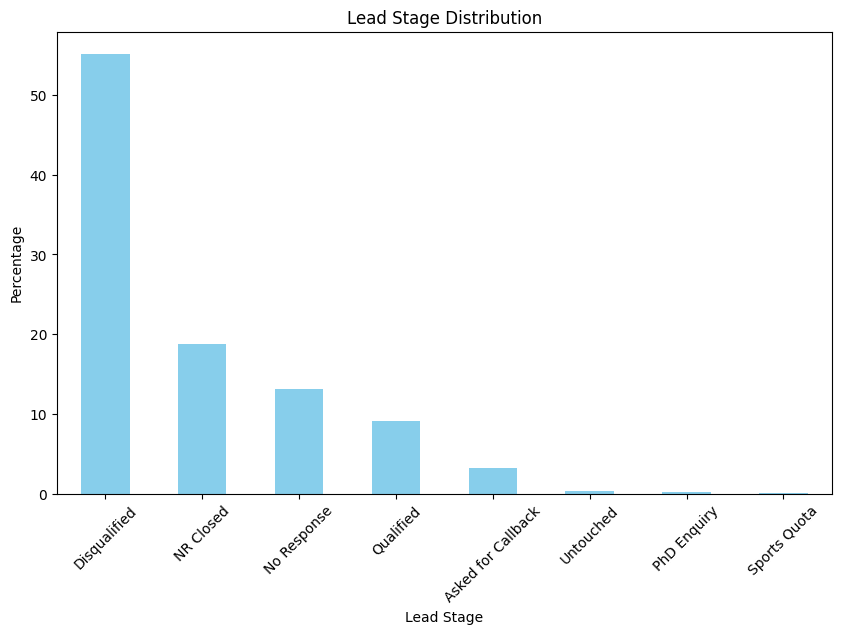

In [61]:
plt.figure(figsize=(10, 6))
lead_stage_dist.plot(kind='bar', color='skyblue')
plt.title('Lead Stage Distribution')
plt.xlabel('Lead Stage')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The **Lead Stage Distribution** shows that the majority of leads (55.2%) have been disqualified, while a significant portion (18.78%) reached the "NR Closed" stage, likely indicating leads that were non-responsive or closed without further action. Only about 9.12% of leads were marked as "Qualified" and 3.25% asked for a callback, suggesting a relatively small percentage of leads progress further down the funnel. The stages like "Untouched" (0.31%), "PhD Enquiry" (0.18%), and "Sports Quota" (0.05%) have minimal representation.

In terms of **Enrollment Status by Lead Origin**, both API and Online sources show a high percentage of leads not enrolling—99.6% for API and 98.4% for Online. Very few leads from either source convert to enrollments (0.4% for API and 1.6% for Online), indicating challenges in converting leads from both sources into actual enrollments.


B. Verification and Enrolment Status
Verifying email and mobile contact information is likely an essential step toward enrollment:

* Compare the Email Verification Status and Mobile Verification Status with Enrolment Status to see if verified leads are more likely to enroll.

In [33]:
# Crosstab: Email verification vs Enrolment status
email_vs_enroll = pd.crosstab(df['Email Verification Status'], df['Enrolment Status'], normalize='index') * 100
print("Email Verification vs Enrolment Status (%):\n", email_vs_enroll)

# Crosstab: Mobile verification vs Enrolment status
mobile_vs_enroll = pd.crosstab(df['Mobile Verification Status'], df['Enrolment Status'], normalize='index') * 100
print("Mobile Verification vs Enrolment Status (%):\n", mobile_vs_enroll)


Email Verification vs Enrolment Status (%):
 Enrolment Status                  No       Yes
Email Verification Status                     
No                         99.793700  0.206300
Yes                        93.245779  6.754221
Mobile Verification vs Enrolment Status (%):
 Enrolment Status                    No       Yes
Mobile Verification Status                      
No                          100.000000  0.000000
Yes                          96.086957  3.913043


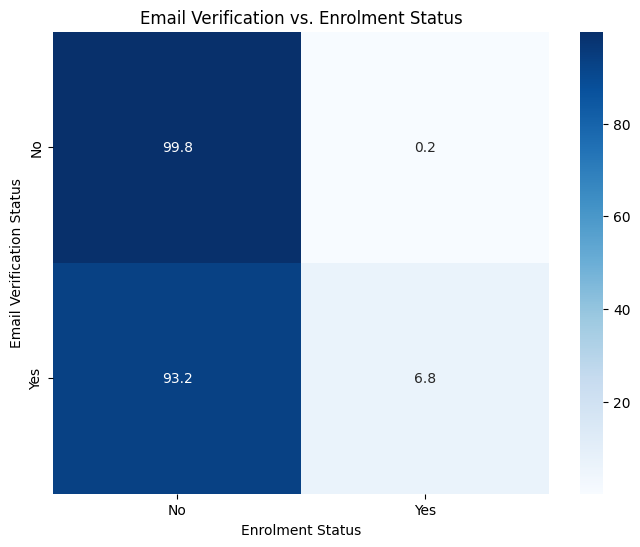

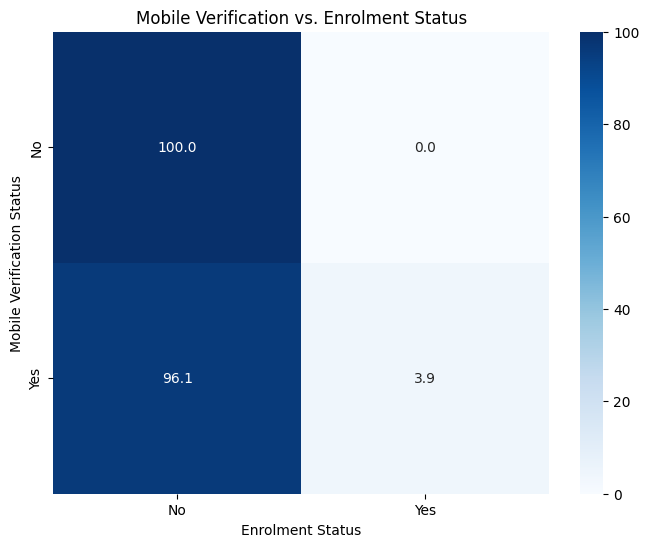

In [62]:
# Email Verification vs. Enrollment Status
plt.figure(figsize=(8, 6))
sns.heatmap(email_vs_enroll, annot=True, cmap='Blues', fmt='.1f')
plt.title('Email Verification vs. Enrolment Status')
plt.xlabel('Enrolment Status')
plt.ylabel('Email Verification Status')
plt.show()

# Mobile Verification vs. Enrollment Status
plt.figure(figsize=(8, 6))
sns.heatmap(mobile_vs_enroll, annot=True, cmap='Blues', fmt='.1f')
plt.title('Mobile Verification vs. Enrolment Status')
plt.xlabel('Enrolment Status')
plt.ylabel('Mobile Verification Status')
plt.show()

The analysis of **Email Verification vs Enrolment Status** reveals that leads with unverified emails almost never enroll, with 99.79% of them not converting. In contrast, leads with verified emails are significantly more likely to enroll, with 6.75% successfully converting, though the majority (93.25%) still do not enroll. This suggests that verifying email addresses is crucial for improving the likelihood of enrollment.

Similarly, in the **Mobile Verification vs Enrolment Status** analysis, none of the leads with unverified mobile numbers enroll, as 100% do not convert. However, 3.91% of leads with verified mobile numbers do enroll, showing that mobile verification also plays an important role in the enrollment process, though its impact appears to be slightly lower than email verification.

Both analyses underscore the importance of contact verification (both email and mobile) in boosting the chances of lead conversion to enrollment.

C. Progression through Funnel
Leads move through different stages of the funnel, but the progression may vary. You could track the number of Form Initiated, Paid Applications, and Submitted Applications:


*   How many leads that initiated a form actually submitted their application?
*   How many applications were converted into paid enrollments?





In [34]:
# Progression through the funnel
funnel_progression = df[['Form Initiated', 'Paid Applications', 'Submitted Applications']].sum()
print("Funnel Progression:\n", funnel_progression)

# Analyze conversion rate for each stage
conversion_rate = funnel_progression / len(df) * 100
print("Conversion Rate for Funnel Stages (%):\n", conversion_rate)


Funnel Progression:
 Form Initiated            1282
Paid Applications          428
Submitted Applications     426
dtype: int64
Conversion Rate for Funnel Stages (%):
 Form Initiated            4.056449
Paid Applications         1.354259
Submitted Applications    1.347931
dtype: float64


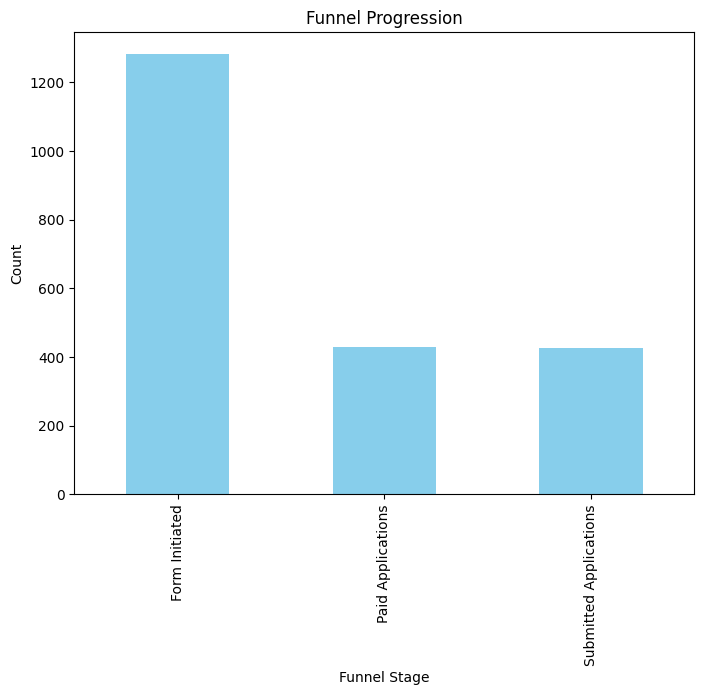

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
funnel_progression.plot(kind='bar', color='skyblue')
plt.title('Funnel Progression')
plt.xlabel('Funnel Stage')
plt.ylabel('Count')
plt.show()

The **Funnel Progression** data indicates that out of 31,604 total leads, 1,282 initiated a form, 428 proceeded to make a paid application, and 426 ultimately submitted their application. This reveals a significant drop-off between each stage of the funnel.

The **Conversion Rates** highlight this drop-off more clearly:
- **Form Initiated**: 4.06% of the total leads initiated the application form.
- **Paid Applications**: Only 1.35% of leads paid for their application, reflecting a sharp decline from those who initially showed interest.
- **Submitted Applications**: 1.35% of the total leads completed and submitted their application, closely aligning with the number of paid applications.

This shows that while a moderate number of leads express initial interest (form initiation), a much smaller portion progresses through to paid and submitted applications. Improving engagement during these steps could help reduce drop-off and increase conversions.

D. Course and Specialization Preferences
Understanding the courses or specializations that are most popular:


*   
Which courses and specializations are most popular among leads?
* Is there a correlation between course/specialization choices and enrollment status?



In [74]:
# Top courses and specializations
top_courses = df['Course'].value_counts().head(10)
top_specializations = df['Specialization'].value_counts()[2:12]  #removing specialisation not available

print("Top 10 Courses:\n", top_courses)
print("Top 10 Specializations:\n", top_specializations)

# Specialization vs Enrolment Status
specialization_vs_enroll = pd.crosstab(df['Specialization'], df['Enrolment Status'])
specialization_vs_enroll = specialization_vs_enroll.drop('Specialization Not Available', axis=0)
print("Specialization vs Enrolment Status:\n", specialization_vs_enroll)


Top 10 Courses:
 Course
B.Com (H)                                                                                                                2697
B.Ed                                                                                                                     2355
BA LLB (Hons.)                                                                                                           1316
B.Pharm                                                                                                                   988
BBA in Logistics and Supply Chain Management                                                                              898
BCA                                                                                                                       896
BCA (Hons) in Banking, Financial Services and Insurance                                                                   800
BBA (Human Resource, Marketing, Finance, Business Analytics, Digital Marketing, Entrepreneursh

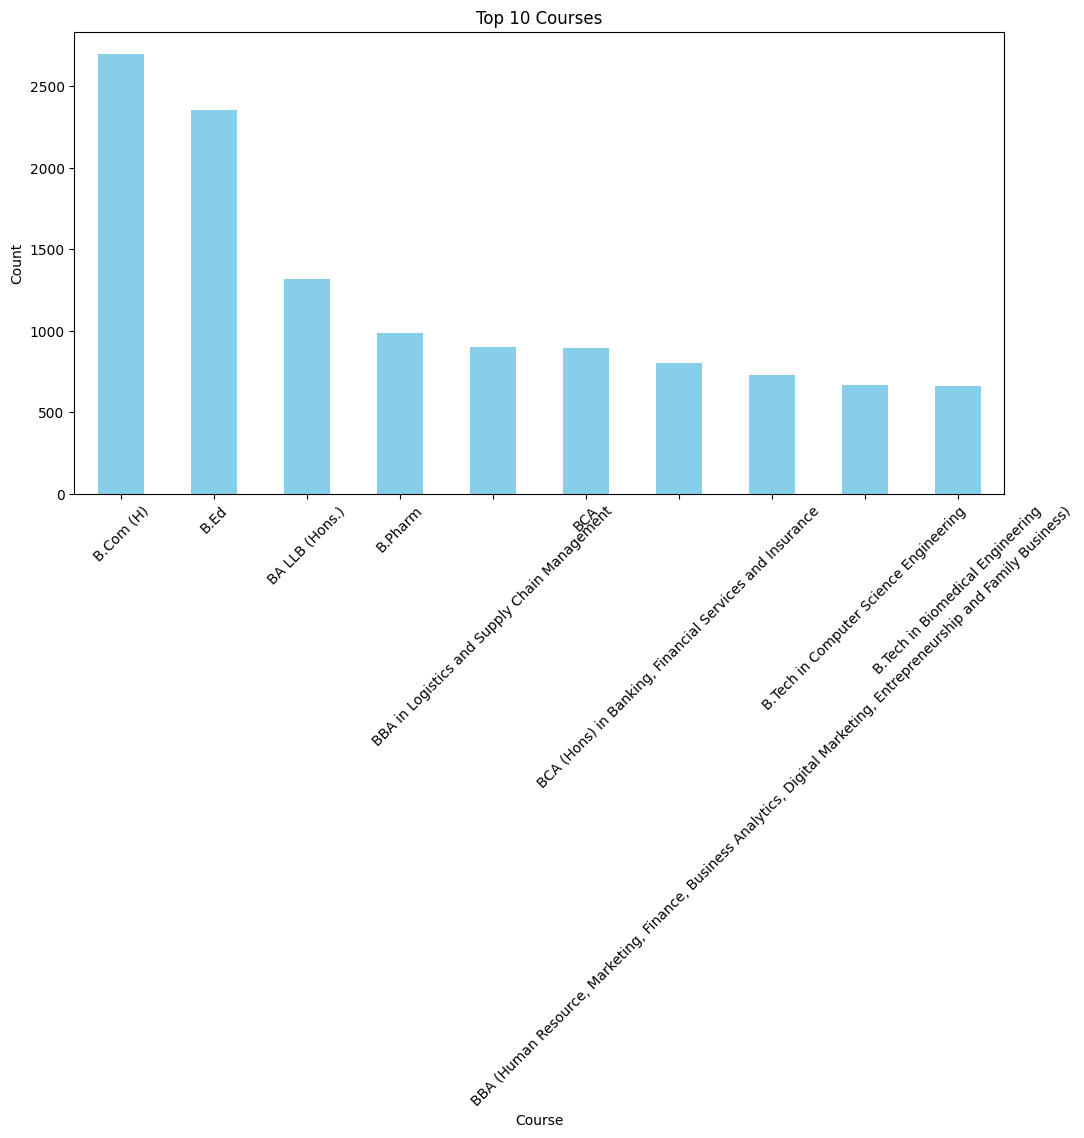

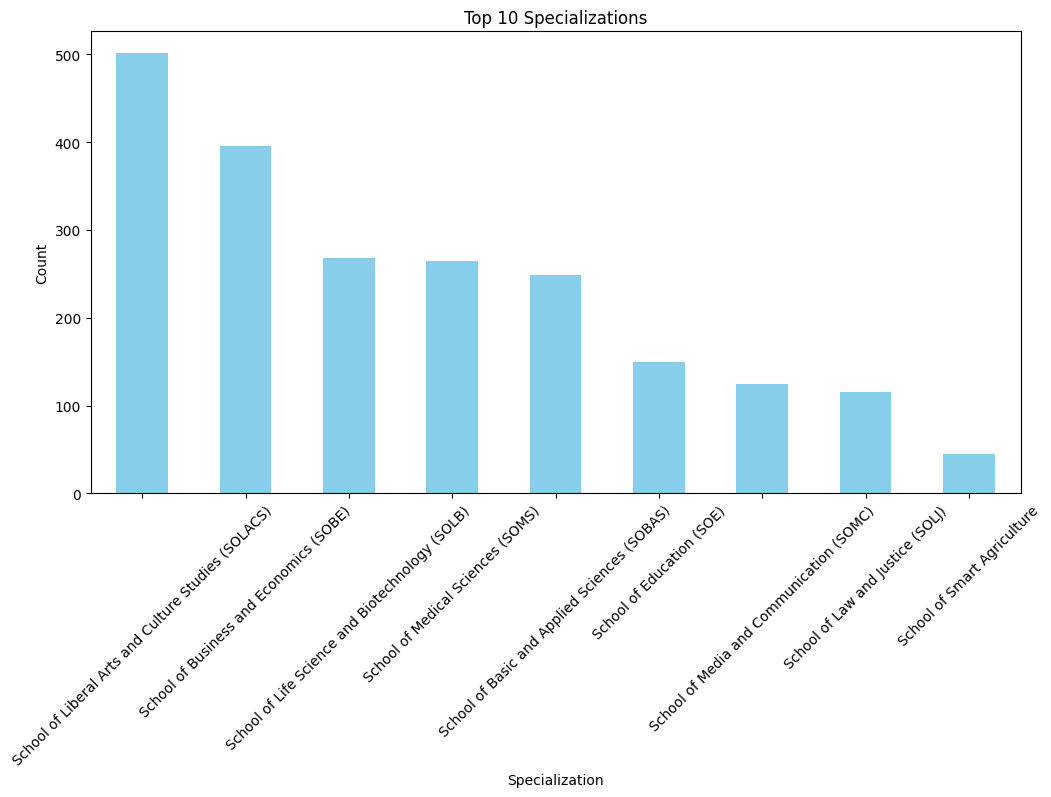

In [75]:

# Top Courses
plt.figure(figsize=(12, 6))
top_courses.plot(kind='bar', color='skyblue')
plt.title('Top 10 Courses')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top Specializations
plt.figure(figsize=(12, 6))
top_specializations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Specializations')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the top 10 courses, it is evident that the most popular programs are primarily undergraduate degrees, with B.Com (H) attracting the highest number of leads (2,697), followed by B.Ed (2,355), and BA LLB (Hons.) (1,316). Programs like BBA in Logistics and Supply Chain Management, BCA, and specialized B.Tech programs are also among the top choices, reflecting high demand for courses in commerce, education, law, and technology.

Regarding specializations, most leads (28,770) did not specify a specialization. Among those who did, School of Engineering and Technology (SOET) leads with 722 inquiries, followed by School of Liberal Arts and Culture Studies (SOLACS) and School of Business and Economics (SOBE). In terms of enrollment success, the School of Engineering and Technology (SOET) had the highest number of enrollments (35), followed by SOBE (23) and SOLB (18), indicating strong interest and conversion in technical and business-related fields. Specializations like School of Media and Communication (SOMC) and School of Law and Justice (SOLJ) show lower conversion rates, suggesting potential challenges in attracting and converting leads in those areas.









E. Timing Analysis
Leads may have different behaviors based on when they were created and last active:


*   Analyze lead activity over time by looking at Instance Date and Last Lead Activity Date.
*   Are there patterns indicating when leads are most active or likely to convert?

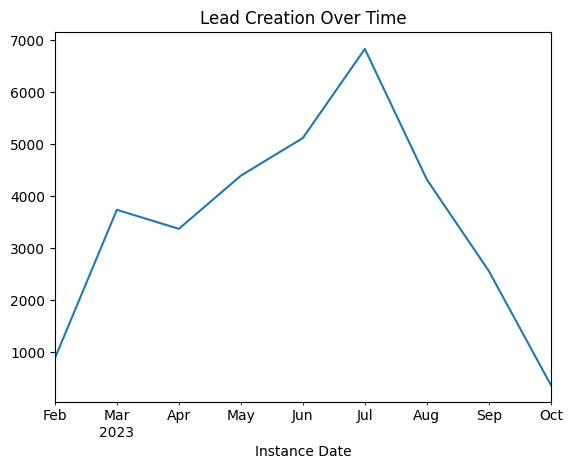

In [39]:
# Analyze lead creation trends over time
df['Instance Date'].groupby(df['Instance Date'].dt.to_period('M')).count().plot(kind='line', title="Lead Creation Over Time")
plt.show()




The line chart illustrates the trend of lead creation over time from February to October 2023. The number of leads created generally increased from February to July, reaching a peak in July. However, there was a significant decline in lead creation from August to October. This could be attributed to various factors, such as seasonal fluctuations, changes in marketing strategies, or external economic conditions. Further analysis would be required to pinpoint the exact causes of this trend.

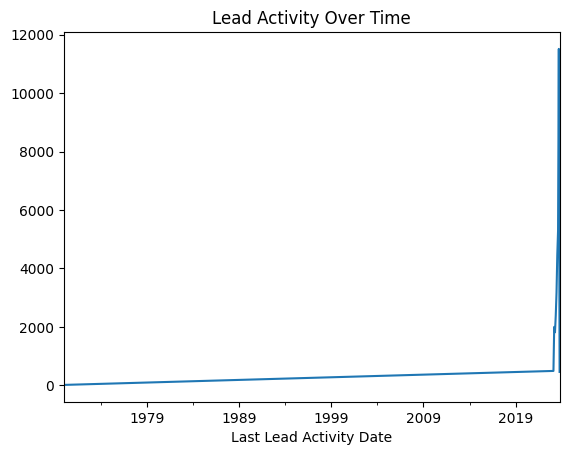

In [40]:
# Analyze last activity trends over time
df['Last Lead Activity Date'].groupby(df['Last Lead Activity Date'].dt.to_period('M')).count().plot(kind='line', title="Lead Activity Over Time")
plt.show()

Before 2019: The number of leads remained relatively low and stable throughout the period. There was a gradual increase in lead activity, but the overall trend was consistent. This suggests that the company's lead generation efforts were relatively consistent and had a steady impact on the customer base.

After 2019 (covid)
: There was a dramatic surge in lead activity, with a significant increase in the number of leads generated. This could be attributed to various factors, such as changes in marketing strategies, increased online presence, or external economic conditions. The sharp rise in lead activity indicates a significant shift in the company's lead generation performance.

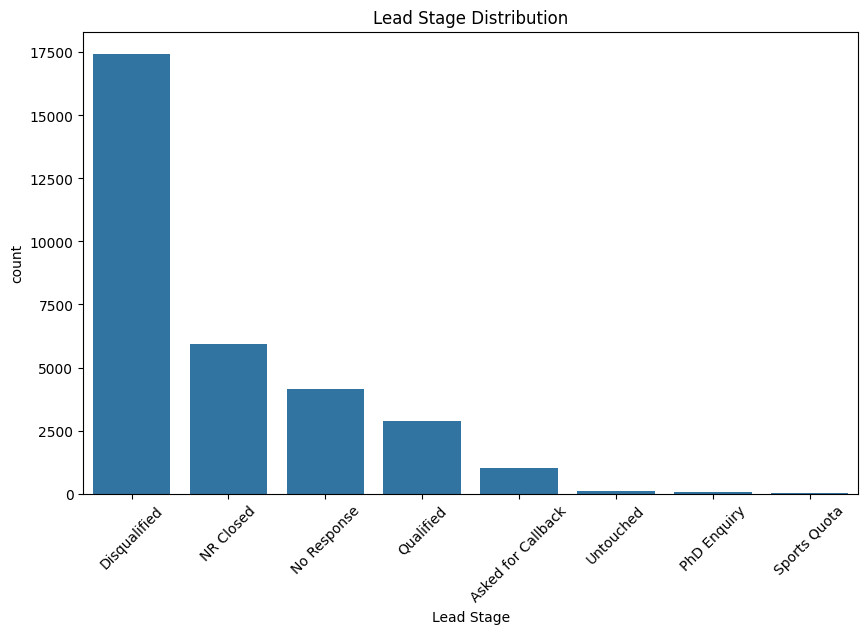

In [41]:
# Funnel stage distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Lead Stage', order=df['Lead Stage'].value_counts().index)
plt.title('Lead Stage Distribution')
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates the distribution of leads across various stages in a sales pipeline. The most common lead stage is "Disqualified," indicating that a significant portion of leads are not considered suitable for further engagement. Other common stages include "NR Closed" and "No Response," suggesting that many leads either do not progress to the next stage or do not engage with the sales team. The remaining stages, such as "Qualified," "Asked for Callback," "Untouched," "PhD Enquiry," and "Sports Quota," have significantly lower numbers of leads. This analysis reveals that the sales process is facing challenges in converting leads into qualified opportunities and maintaining engagement.

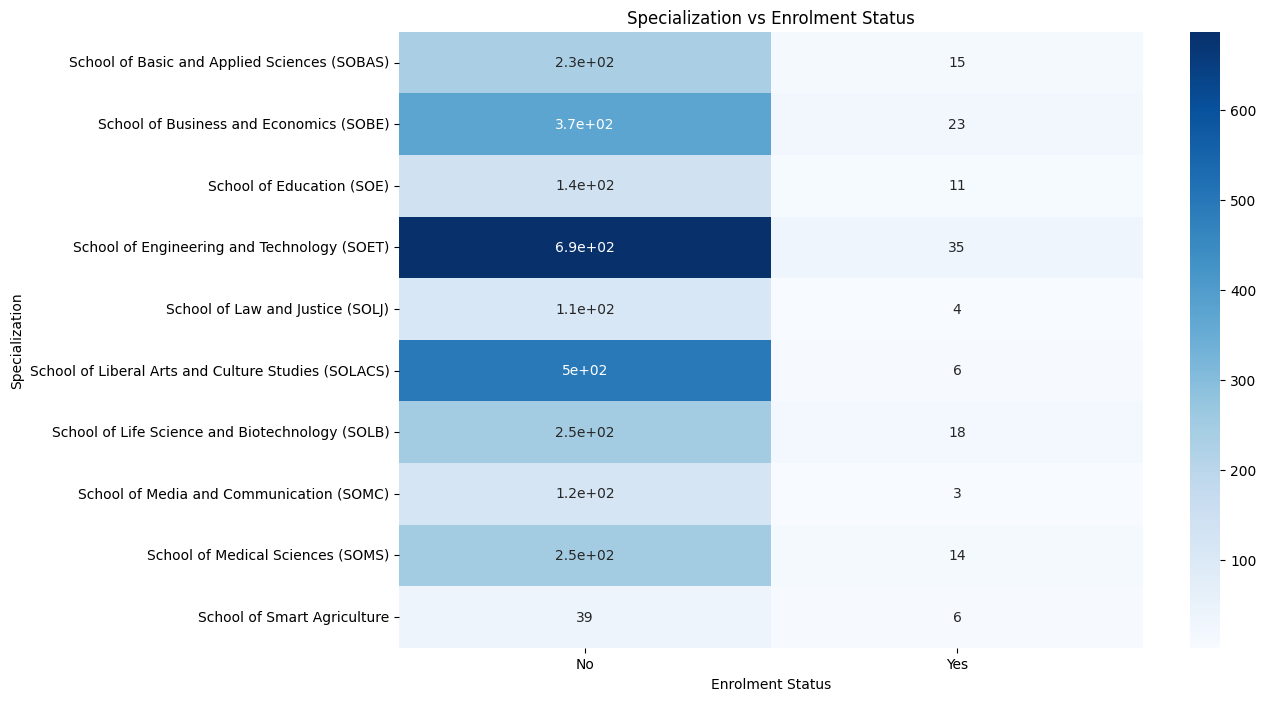

In [59]:
# Enrollment by specialization heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(specialization_vs_enroll, annot=True, cmap='Blues')
plt.title('Specialization vs Enrolment Status')
plt.show()

The heatmap illustrates the relationship between specialization and enrollment status across various schools. The color intensity represents the number of students enrolled in each specialization. The results indicate that the School of Basic and Applied Sciences (SOBAS) has the highest number of students enrolled, followed by the School of Business and Economics (SOBE). In contrast, the School of Smart Agriculture and the Specialization Not Available category have the lowest number of students. The heatmap also reveals that enrollment status is not evenly distributed across specializations, with some having a higher proportion of enrolled students than others. Overall, the analysis provides insights into the popularity and enrollment trends in different academic areas.